In [ ]:
# This is an example of constrained optimization using Steepest Descent
# the function : (x1 + x2)^2 - 10(x1 + x2)
# st. 3*x1 + x2 - 6 < 0 & x1^2 + x2^2 -5 < 0 & x1 > 0 

In [3]:
import numpy as np
from numpy import transpose as tr
from numpy.linalg import norm
import matplotlib.pyplot as plt
import math

In [81]:
# Implement Steepest Descent
def steepest_descent(x0, M, tol=1e-3, max_iter=500):
    x_k = x0.copy()
    violations_norms = []
    function_values = []
    x0_grad = gradient(x_k, M[0])

    for m in M:
        for k in range(100):
            grad_k = gradient(x_k, m)
            alpha_k = armijo_line_search(x_k, grad_k, m)
            x_k = x_k - alpha_k * grad_k
            F_k = objective_function(x_k, m)
    
            function_values.append(F_k)
            violations_norms.append(get_violation(x_k))
            
            # if norm(grad_k) / norm(x0_grad) < tol:
            #     return function_values, violations_norms

    return function_values, violations_norms, x_k

In [72]:
def armijo_line_search(x, grad_x, m, alpha0=0.1, beta=0.5, sigma=1e-4):
    alpha = alpha0
    while objective_function(x - alpha * grad_x, m) > objective_function(x, m) - sigma * alpha * (grad_x @ grad_x):
        alpha *= beta

    return alpha

In [86]:
def objective_function(x, m): 
    
    return (x[0]+x[1])**2 - 10*(x[0]+ x[1]) + m*(3*x[0] + x[1] -6)**2 + m*(max(0,(x[0])**2 + x[1]**2 -5))**2 + m*(max(0, -x[0]))**2 

In [87]:
def get_violation(x):
    return (3*x[0] + x[1] -6)**2 + max(0,(x[0])**2 + x[1]**2 -5)**2 + max(0, -x[0])**2

In [88]:
def gradient(x, m):
    d1 = 2*(x[0] + x[1]) - 10 + 6*m*(3*x[0] + x[1] - 6)
    d2 = 2*(x[0] + x[1]) - 10 + 2*m*(3*x[0] + x[1] - 6)
    constraint1 = x[0]**2 + x[1]**2 -5
    constraint2 = -x[0]
    if constraint1>0:
        d1 += 4*m*x[0]*(constraint1)
        d2 += 4*m*x[1]*(constraint1)
    if constraint2>0:
        d1 += 2*m*x[0]
    return np.array([d1,d2])
    

In [89]:
M = [0.01,0.1,1,10,100]
x0 = np.array([0,0])

In [90]:
function_values, violations_norms, x_k = steepest_descent(x0, M)

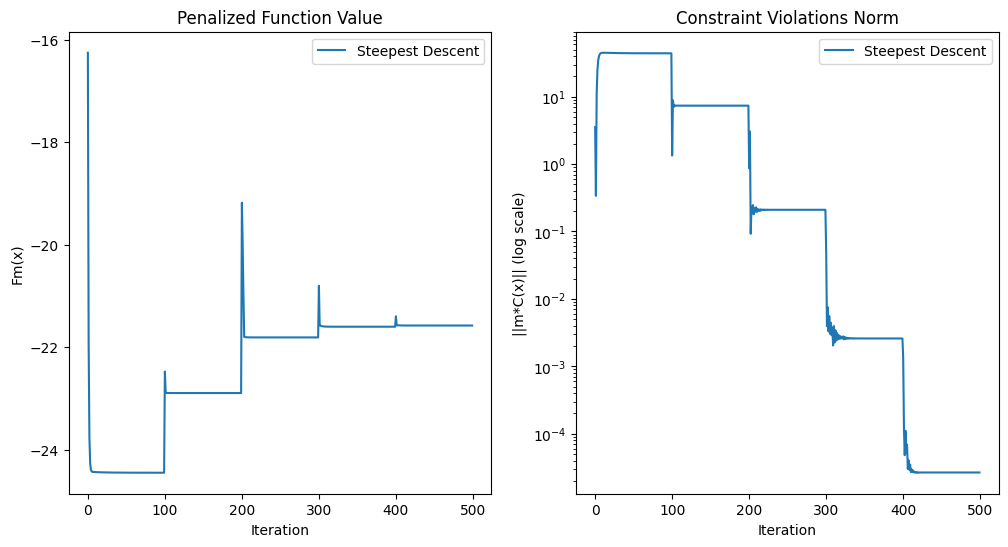

In [91]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].plot(function_values, label='Steepest Descent')
ax[0].set_title('Penalized Function Value')
ax[0].set_xlabel('Iteration')
ax[0].set_ylabel('Fm(x)')
ax[0].legend()

# Gradient norm
ax[1].semilogy(violations_norms, label='Steepest Descent')
ax[1].set_title('Constraint Violations Norm')
ax[1].set_xlabel('Iteration')
ax[1].set_ylabel('||m*C(x)|| (log scale)')
ax[1].legend()

plt.show()

In [95]:
x_k, objective_function(x_k, 0)

(array([1.42585224, 1.72391553]), -21.57664069061672)

In [96]:
x_k, objective_function([1.425, 1.722], 0)

(array([1.42585224, 1.72391553]), -21.566391000000003)